<a href="https://colab.research.google.com/github/diyosukma/CP68-SistemRekomendasi/blob/main/Content_based_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
#nltk.download()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
eskul = pd.read_excel('kuesioner_eskul.xlsx')


In [ ]:
eskul

,nama,asal_sekolah,sulit_memilih,gender,agama,jurusan,bidang_ekstrakurikuler,pekerjaan_ibu,pekerjaan_bapak,sungguh_berkegiatan,minatbakat_tersalurkan,alasan_memilih,teman_berpengaruh,lama_pertemuan,banyak_pertemuan,minat_bakat
0,Siswa01,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Kesenian,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Olahraga,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,SMA Negeri 1 Kota Sukabumi,Tidak,Perempuan,Islam,IPA,Akademik & Kebahasaan,Ibu rumah tangga,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Olahraga,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Kesenian,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Siswa289,SMA 1 Semarang,Tidak,Perempuan,Islam,IPS,Lingkungan Hidup,IRT,Sopir,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...
289,Siswa290,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,Akademik & Kebahasaan,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
290,Siswa291,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,IT,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
291,Siswa292,SMA 6 Jakarta,Ya,Perempuan,Kristen Katolik,IPA,Akademik & Kebahasaan,Ibu rumah tangga,Pegawai bank,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...


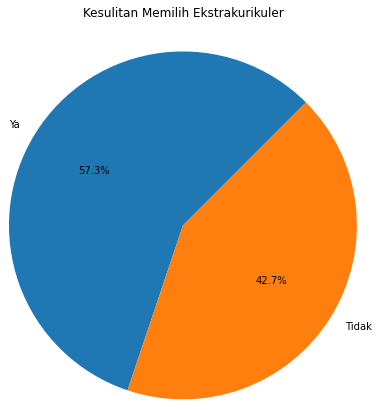

In [ ]:
value_count_kesulitan = eskul['sulit_memilih'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_kesulitan['Ya'], 
        value_count_kesulitan['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Kesulitan Memilih Ekstrakurikuler", pad=100)
plt.show()

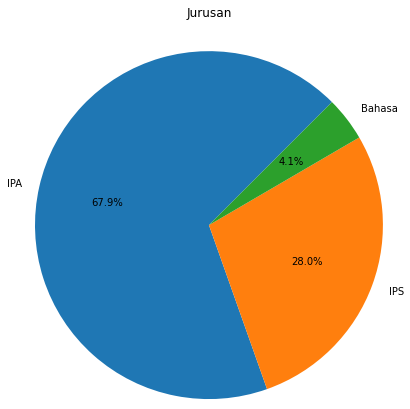

In [ ]:
value_count_jurusan = eskul['jurusan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_jurusan['IPA'], 
        value_count_jurusan['IPS'],
        value_count_jurusan['Bahasa']], 
        labels=['IPA', 'IPS', 'Bahasa'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Jurusan", pad=100)
plt.show()

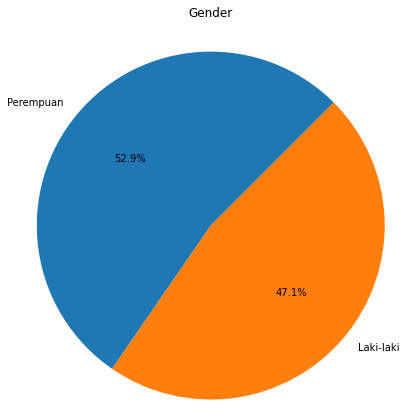

In [ ]:
value_count_gender = eskul['gender'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_gender[0], 
        value_count_gender[1]], 
        labels=['Perempuan', 'Laki-laki'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Gender", pad=100)
plt.show()

In [ ]:
eskul.isnull().sum()

nama                      0
asal_sekolah              0
sulit_memilih             0
gender                    0
agama                     0
jurusan                   0
bidang_ekstrakurikuler    0
pekerjaan_ibu             0
pekerjaan_bapak           0
sungguh_berkegiatan       0
minatbakat_tersalurkan    0
alasan_memilih            0
teman_berpengaruh         0
lama_pertemuan            0
banyak_pertemuan          0
minat_bakat               0
dtype: int64

In [ ]:
data_eskul = eskul[["nama", "gender", 
         "bidang_ekstrakurikuler", "alasan_memilih", "lama_pertemuan",  "minat_bakat"]]

In [ ]:
data_eskul

,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat
0,Siswa01,Laki-laki,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...
1,Siswa02,Laki-laki,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...
2,Siswa03,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Siswa04,Perempuan,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...
4,Siswa05,Perempuan,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...
...,...,...,...,...,...,...
288,Siswa289,Perempuan,Lingkungan Hidup,Tekad dari diri sendiri,Lebih dari 1 Jam,Gemar menuangkan ide dalam bentuk tulisan atau...
289,Siswa290,Laki-laki,Akademik & Kebahasaan,Tekad dari diri sendiri,Lebih dari 1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M..."
290,Siswa291,Laki-laki,IT,Tekad dari diri sendiri,Lebih dari 1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M..."
291,Siswa292,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,Lebih dari 1 Jam,Gemar menuangkan ide dalam bentuk tulisan atau...


In [ ]:
data_eskul.info()
data_eskul.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nama                    293 non-null    object
 1   gender                  293 non-null    object
 2   bidang_ekstrakurikuler  293 non-null    object
 3   alasan_memilih          293 non-null    object
 4   lama_pertemuan          293 non-null    object
 5   minat_bakat             293 non-null    object
dtypes: object(6)
memory usage: 13.9+ KB


,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat
count,293,293,293,293,293,293
unique,293,2,6,8,3,69
top,Siswa247,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,Lebih dari 1 Jam,Gemar menuangkan ide dalam bentuk tulisan atau...
freq,1,155,99,220,275,23


In [ ]:
import warnings # menghapus alert warning 
warnings.filterwarnings('ignore')

data_eskul['minat_bakat'] = data_eskul['minat_bakat'].astype(str) # mengecek sinopsis
print(data_eskul['minat_bakat'].head())

0    Cenderung menyukai untuk bekerja secara berkel...
1    Cenderung menyukai untuk bekerja secara berkel...
2    Menggemari kegiatan yang melibatkan tulisan, M...
3    Mempertimbangkan baik sisi plus ataupun minus ...
4    Mempertimbangkan baik sisi plus ataupun minus ...
Name: minat_bakat, dtype: object


In [ ]:
# proses instalasi rak-nltk dan import library yang sibutuhkan
!pip install rake-nltk

from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 749 kB 52.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Inisialisasi kolom kosong
data_eskul['Keywords'] = ''

# fungsi untuk keyword
def get_keywords(x):
    plot = x
    
    # inisialisasi Rake menggunakan stopword bahasa Inggris dari NLTK, dan semua karakter tanda baca
    r = Rake()
    
    # extract keywords from text
    r.extract_keywords_from_text(plot)
    
    # get dictionary with keywords and scores
    scores = r.get_word_degrees()
    
    # return new keywords as list, ignoring scores
    return(list(scores.keys()))

# Apply function to generate keywords
data_eskul['Keywords'] = data_eskul['minat_bakat'].apply(get_keywords)
data_eskul.head()

,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat,Keywords
0,Siswa01,Laki-laki,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ..."
1,Siswa02,Laki-laki,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ..."
2,Siswa03,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M...","[menggemari, kegiatan, yang, melibatkan, tulis..."
3,Siswa04,Perempuan,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."
4,Siswa05,Perempuan,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ..."


In [ ]:
# tokenize data bidang eskul

def tokenize(x):
    if isinstance(x, list):
        return [i.lower().split(", ") for i in x]
    else:
        if isinstance(x, str):
            return x.lower().split(", ")
        else:
            return ''   

data_eskul['bidang_eskul'] = data_eskul['bidang_ekstrakurikuler'].apply(tokenize)
data_eskul.head()

,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat,Keywords,bidang_eskul
0,Siswa01,Laki-laki,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[kesenian]
1,Siswa02,Laki-laki,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[olahraga]
2,Siswa03,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M...","[menggemari, kegiatan, yang, melibatkan, tulis...",[akademik & kebahasaan]
3,Siswa04,Perempuan,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[olahraga]
4,Siswa05,Perempuan,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[kesenian]


In [ ]:
# tokenize data bidang eskul

def tokenize(x):
    if isinstance(x, list):
        return [i.lower().split(", ") for i in x]
    else:
        if isinstance(x, str):
            return x.lower().split(", ")
        else:
            return ''   

data_eskul['alasan_pilih'] = data_eskul['alasan_memilih'].apply(tokenize)
data_eskul.head()

,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat,Keywords,bidang_eskul,alasan_pilih
0,Siswa01,Laki-laki,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[kesenian],[tekad dari diri sendiri]
1,Siswa02,Laki-laki,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[olahraga],[tekad dari diri sendiri]
2,Siswa03,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M...","[menggemari, kegiatan, yang, melibatkan, tulis...",[akademik & kebahasaan],[tekad dari diri sendiri]
3,Siswa04,Perempuan,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[olahraga],[tekad dari diri sendiri]
4,Siswa05,Perempuan,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[kesenian],[tekad dari diri sendiri]


In [ ]:
# tokenize data bidang eskul

def tokenize(x):
    if isinstance(x, list):
        return [i.lower().split(", ") for i in x]
    else:
        if isinstance(x, str):
            return x.lower().split(", ")
        else:
            return ''   

data_eskul['lama_temu'] = data_eskul['lama_pertemuan'].apply(tokenize)
data_eskul.head()

,nama,gender,bidang_ekstrakurikuler,alasan_memilih,lama_pertemuan,minat_bakat,Keywords,bidang_eskul,alasan_pilih,lama_temu
0,Siswa01,Laki-laki,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[kesenian],[tekad dari diri sendiri],[lebih dari 1 jam]
1,Siswa02,Laki-laki,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Cenderung menyukai untuk bekerja secara berkel...,"[cenderung, menyukai, untuk, bekerja, secara, ...",[olahraga],[tekad dari diri sendiri],[lebih dari 1 jam]
2,Siswa03,Perempuan,Akademik & Kebahasaan,Tekad dari diri sendiri,1 Jam,"Menggemari kegiatan yang melibatkan tulisan, M...","[menggemari, kegiatan, yang, melibatkan, tulis...",[akademik & kebahasaan],[tekad dari diri sendiri],[1 jam]
3,Siswa04,Perempuan,Olahraga,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[olahraga],[tekad dari diri sendiri],[lebih dari 1 jam]
4,Siswa05,Perempuan,Kesenian,Tekad dari diri sendiri,Lebih dari 1 Jam,Mempertimbangkan baik sisi plus ataupun minus ...,"[mempertimbangkan, baik, sisi, plus, ataupun, ...",[kesenian],[tekad dari diri sendiri],[lebih dari 1 jam]


In [ ]:
# fungsi bag_word
data_eskul_keys = pd.DataFrame() 

data_eskul_keys['namasiswa'] = data_eskul['nama']
data_eskul_keys['bag_of_words'] = ''

def bag_words(x):
    return(' '.join(x['bidang_eskul'])+ '/ ' + ' '.join(x['Keywords']) + ' ' + ' '.join(x['alasan_pilih'])+ ' ' + ' '.join(x['lama_temu']) )
data_eskul_keys['bag_of_words'] = data_eskul.apply(bag_words, axis = 1)

data_eskul_keys.head()

,namasiswa,bag_of_words
0,Siswa01,kesenian/ cenderung menyukai untuk bekerja sec...
1,Siswa02,olahraga/ cenderung menyukai untuk bekerja sec...
2,Siswa03,akademik & kebahasaan/ menggemari kegiatan yan...
3,Siswa04,olahraga/ mempertimbangkan baik sisi plus atau...
4,Siswa05,kesenian/ mempertimbangkan baik sisi plus atau...


In [ ]:
# instal library metrik dan count vectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(data_eskul_keys['bag_of_words'])

In [ ]:
# metrik cosine similarity
cosine_sim = cosine_similarity(bow, bow)
cosine_sim

array([[1.        , 0.98484848, 0.36187343, ..., 0.58217112, 0.50452498,
        0.50694478],
       [0.98484848, 1.        , 0.36187343, ..., 0.58217112, 0.50452498,
        0.50694478],
       [0.36187343, 0.36187343, 1.        , ..., 0.44767856, 0.56076357,
        0.53724598],
       ...,
       [0.58217112, 0.58217112, 0.44767856, ..., 1.        , 0.62502889,
        0.6376886 ],
       [0.50452498, 0.50452498, 0.56076357, ..., 0.62502889, 1.        ,
        0.98565722],
       [0.50694478, 0.50694478, 0.53724598, ..., 0.6376886 , 0.98565722,
        1.        ]])

In [ ]:
# create list of indices for later matching
indices = pd.Series(data_eskul_keys.index, index = data_eskul_keys['namasiswa'])

def recommend_eskul(title, n = 10, cosine_sim = cosine_sim):
    eskul = []
    
    # retrieve matching title index
    if title not in indices.index:
        print("tidak ada user yang mirip")
        return
    else:
        idx = indices[title] 
        

    
    # cosine similarity scores of in descending order
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    # top n most similar indexes
    # use 1:n because 0 is the same user entered
    top_n_idx = list(scores.iloc[1:n].index)
        
    return pd.DataFrame(data_eskul_keys['bag_of_words'].iloc[top_n_idx])

In [ ]:
recommend_eskul('Siswa01')

,bag_of_words
1,olahraga/ cenderung menyukai untuk bekerja sec...
4,kesenian/ mempertimbangkan baik sisi plus atau...
59,kesenian/ cenderung memilih untuk melakukan be...
8,akademik & kebahasaan/ memahami sisi positif m...
9,bela negara/ memahami sisi positif maupun nega...
3,olahraga/ mempertimbangkan baik sisi plus atau...
71,kesenian/ menggemari kegiatan yang melibatkan ...
60,olahraga/ cenderung memilih untuk melakukan be...
104,kesenian/ senang berinteraksi melalui verbal a...
